# Intervalli di confidenza

Esiste una procedura più rigorosa rispetto all'approssimazione parabolica per definire l'intervallo che rappresenta l'incertezza sulla stima di un parametro.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gamma
from scipy.optimize import fsolve
from scipy.optimize import fmin
from scipy.optimize import bisect

Consideriamo una distribuzione normale con $\sigma$ noto e $\mu$ ignoto. Se misuriamo $x=x^\star$, l'intervallo di incertezza per $\mu$ viene riportato com come $[x^\star - \sigma, x^\star + \sigma]$.

Possiamo immaginare di costruire questa stima nel modo seguente:

1. al variare del valore vero $\mu$, viene calcolato l'intervallo centrale corrispondente al 68.27% di probabilità, ossia $[\mu - \sigma, \mu + \sigma]$.
* l'insieme di tutti gli intervalli determina nel piano $x^\star-\mu$ una fascia di confidenza (*confidence band* o *confidence belt* in inglese);
* dato il valore osservato $x=x^\star$, si può *invertire* la fascia di condidenza trovando l'intersezione con la retta verticale corrispondente a $x=x^\star$;
* l'intersezione viene riportata come intervallo di confidenza per $\mu$. In questo caso, l'intevallo è $[x^\star - \sigma, x^\star + \sigma]$.

Questo metodo è generalizzabile a PDF meno regolari del caso normale che abbiamo esaminato.

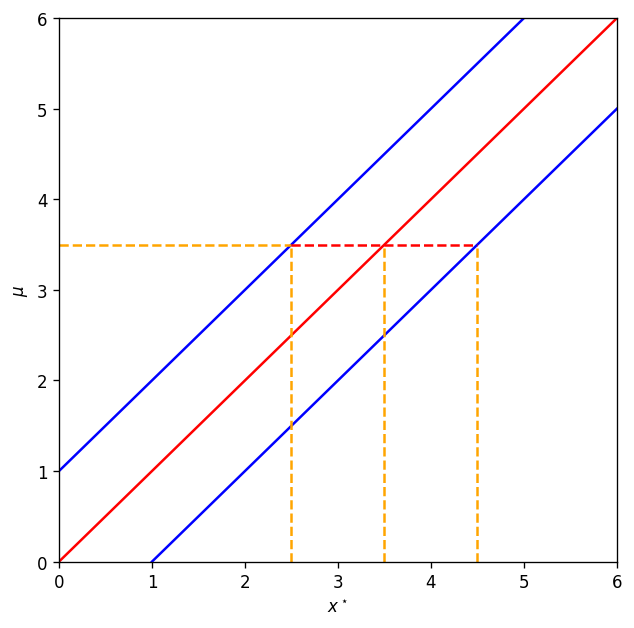

In [2]:
plt.figure(figsize=(6,6), dpi=120)
plt.xlabel(r'$x^\star$')
plt.ylabel(r'$\mu$')
plt.plot([0, 6], [0, 6], color='red')
plt.plot([0, 5], [1, 6], color='blue')
plt.plot([1, 6], [0, 5], color='blue')
mu_0 = x_hat = 3.5
x_lo, x_hi = mu_0 - 1, mu_0 + 1
plt.plot([0, x_lo], [mu_0, mu_0], color='orange', linestyle='--')
plt.plot([x_lo, x_hi], [mu_0, mu_0], color='red', linestyle='--')
plt.plot([x_hi, x_hi], [0, mu_0], color='orange', linestyle='--')
plt.plot([x_lo, x_lo], [0, mu_0], color='orange', linestyle='--')
plt.plot([x_hat, x_hat], [0, mu_0], color='orange', linestyle='--')
plt.ylim(0, 6)
plt.xlim(0, 6)
plt.show()

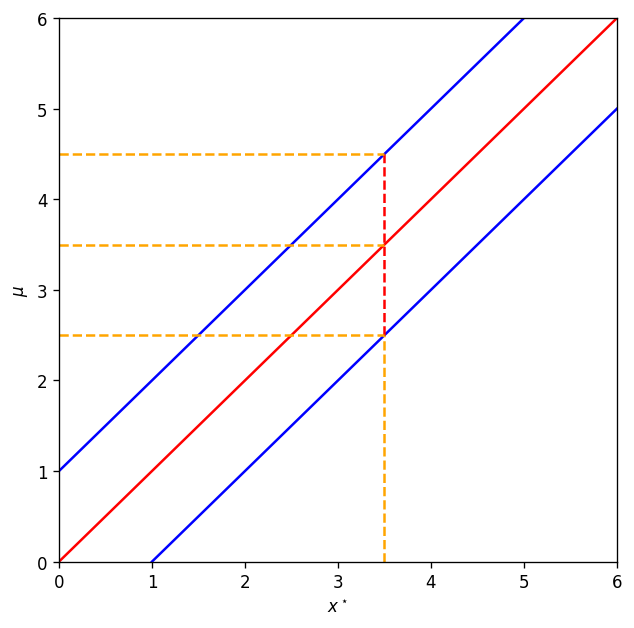

In [3]:
plt.figure(figsize=(6,6), dpi=120)
plt.xlabel(r'$x^\star$')
plt.ylabel(r'$\mu$')
plt.plot([0, 6], [0, 6], color='red')
plt.plot([0, 5], [1, 6], color='blue')
plt.plot([1, 6], [0, 5], color='blue')
x_obs = mu_hat = 3.5
mu_lo, mu_hi = mu_hat - 1, mu_hat + 1
plt.plot([x_obs, x_obs], [0, mu_lo], color='orange', linestyle='--')
plt.plot([x_obs, x_obs], [mu_lo, mu_hi], color='red', linestyle='--')
plt.plot([0, x_obs], [mu_hat, mu_hat], color='orange', linestyle='--')
plt.plot([0, x_obs], [mu_lo, mu_lo], color='orange', linestyle='--')
plt.plot([0, x_obs], [mu_hi, mu_hi], color='orange', linestyle='--')
plt.ylim(0, 6)
plt.xlim(0, 6)
plt.show()

Immaginiamo inveec di stimare il parametro di scala $\theta$ di una distribuzione gamma:

$\displaystyle f(x;\kappa,\theta) = \frac{x^{\kappa-1}e^{-x/\theta}}{\theta^\kappa\,\Gamma(\kappa)}$

Immaginiamo che il parametro $\kappa$ sia noto, ad es.: $\kappa=3$.

La *moda* si può dimostrare essere:

$x^{\mathrm{max}} = \theta\,(\kappa-1)$

Se abbiamo quindi un'osservazione $x$, la stima di massima verosimiglianza di $\theta$ si ottiene ponendo $x=x^\star$, ossia:

$\displaystyle \hat{\theta}=\frac{x^\star}{\kappa-1}$

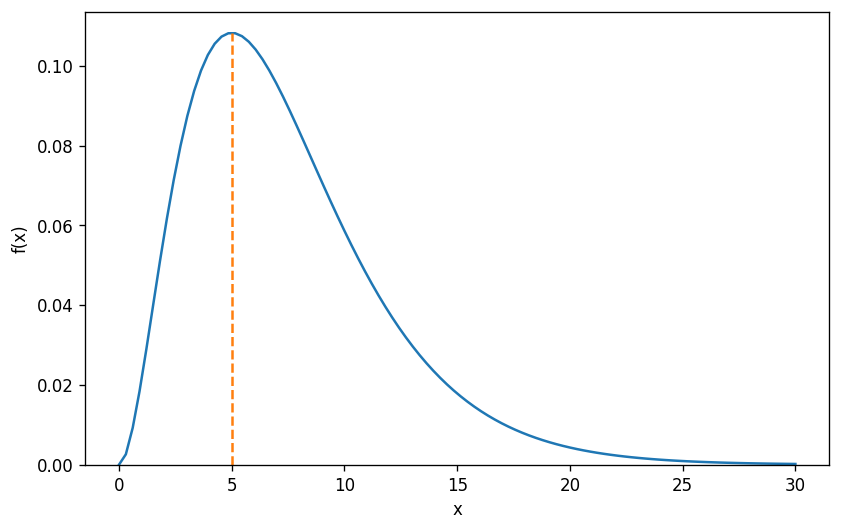

In [4]:
xrange=(0, 30)
x = np.linspace(xrange[0], xrange[1], 100)
k = 3
theta=2.5
model = gamma(k, scale=theta)
y = model.pdf(x)
mode = fmin(lambda x: -model.pdf(x), 1, disp=0)[0]
plt.figure(figsize=(8,5), dpi=120)
plt.plot(x,y)
plt.ylim(bottom=0)
plt.plot([mode,mode], [0, model.pdf(mode)], label='mode', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

Calcoliamo un intervallo che corrisponde ad una probabilità del 68.27%.

<span style="color:blue">Fissato il **livello di confidenza** (*confidence level* o **CL** in inglese), esistono più modi per scegliere un untervallo corrispondente alla probabilità voluta.
Ad esempio, possiamo scegliere code simmetriche con aree uguali. Ma non è l'unica scelta possibile.</span>

[3.42, 11.59]


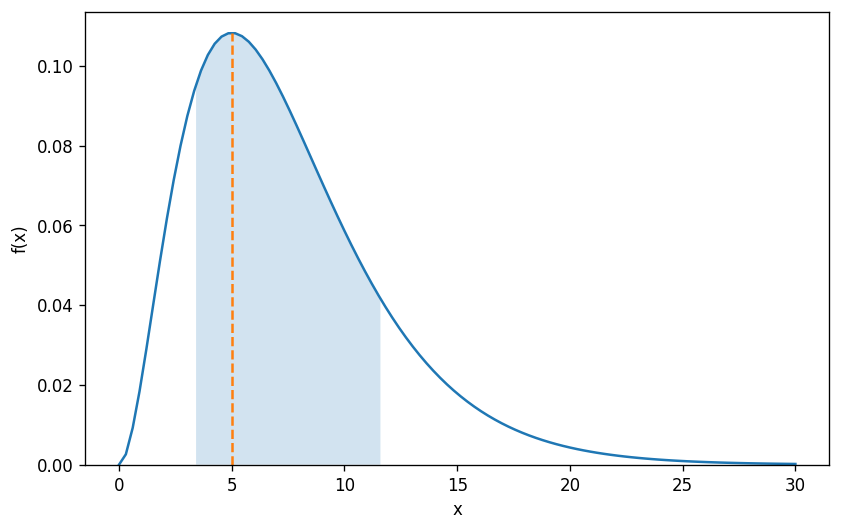

In [5]:
p_lo = (1-.6827)/2
p_hi = 1 - p_lo
x_lo = fsolve(lambda x: model.cdf(x)-p_lo, 0)[0]
x_hi = fsolve(lambda x: model.cdf(x)-p_hi, 100)[0]
print("[{:.2f}, {:.2f}]".format(x_lo, x_hi))
x_ab = np.linspace(x_lo, x_hi, 100)
y_ab = model.pdf(x_ab)
plt.figure(figsize=(8,5), dpi=120)
plt.plot(x,y)
plt.ylim(bottom=0)
plt.plot([mode,mode], [0, gamma.pdf(mode, k, scale=theta)], label='mode', linestyle='--')
plt.fill_between(x_ab, y_ab, alpha=0.2)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

Calcoliamo la **banda di confidenza** al 68% di **livello di confidenza** (CL).

Visto che abbiamo modificato solo il parametro di scala, è naturale che la banda di confidenza sia uno "spicchio" nel piano $(\hat{x}, \theta)$.

In [6]:
def interval(theta):
    if theta == 0: return 0, 0, 0, 0
    else:
        model = gamma(k, scale=theta)
        x_hat = fmin(lambda x: -model.pdf(x), 1, disp=0)[0]
        x_lo = fsolve(lambda x: model.cdf(x)-p_lo, 0)[0]
        x_hi = fsolve(lambda x: model.cdf(x)-p_hi, 1)[0]
        return theta, x_hat, x_lo, x_hi

In [7]:
band = [interval(theta) for theta in np.linspace(0.05, 2.0, 100)]

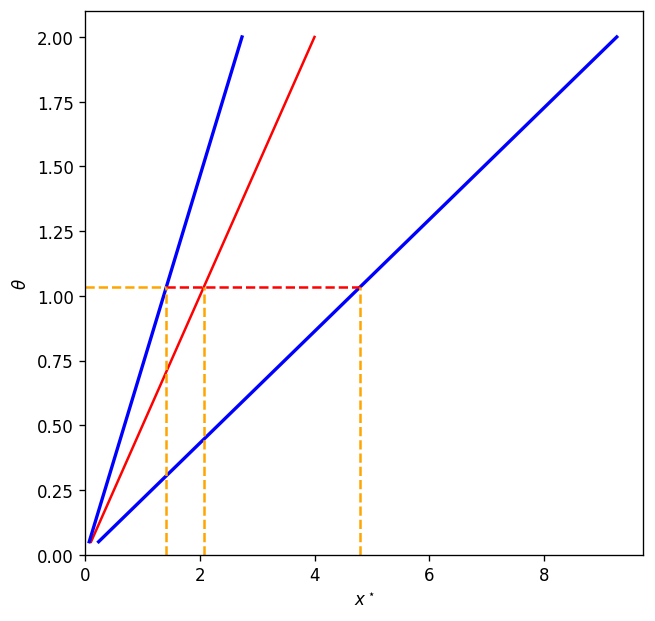

In [8]:
from scipy.interpolate import interp1d
theta = [i[0] for i in band]
x_hat = [i[1] for i in band]
x_lo = [i[2] for i in band]
x_hi = [i[3] for i in band]
plt.figure(figsize=(6,6), dpi=120)
plt.plot(x_hat, theta, linestyle='-', color='r')
plt.plot(x_lo, theta, color='b', linewidth=2)
plt.plot(x_hi, theta, color='b', linewidth=2)
pos=50
theta_0 = theta[pos]
plt.plot([0, x_lo[pos]], [theta_0, theta_0], color='orange', linestyle='--')
plt.plot([x_lo[pos], x_hi[pos]], [theta_0, theta_0], color='red', linestyle='--')
plt.plot([x_hi[pos], x_hi[pos]], [0, theta_0], color='orange', linestyle='--')
plt.plot([x_lo[pos], x_lo[pos]], [0, theta_0], color='orange', linestyle='--')
plt.plot([x_hat[pos], x_hat[pos]], [0, theta_0], color='orange', linestyle='--')
plt.xlabel(r'$x^\star$')
plt.ylabel(r'$\theta$')
plt.ylim(0)
plt.xlim(0)
plt.show()

Possiamo costruire l'**intervallo di confidenza** al 68% CL invertendo la banda di confidenza:

In [9]:
band_lo = interp1d(x_lo, theta)
band_hi = interp1d(x_hi, theta)
band_hat = interp1d(x_hat, theta)
x_obs = 1.8
# notare l'inversione tra lo e hi:
theta_lo, theta_hi = band_hi(x_obs), band_lo(x_obs)
theta_hat = band_hat(x_obs)
err_lo, err_hi = theta_hat - theta_lo, theta_hi - theta_hat
print("theta interval: [{:.2f}, {:.2f}] at 68% CL".format(theta_lo, theta_hi))
print("theta = {:.2f} +{:.2f}/-{:.2f}".format(theta_hat, err_lo, err_hi))

theta interval: [0.39, 1.32] at 68% CL
theta = 0.90 +0.51/-0.42


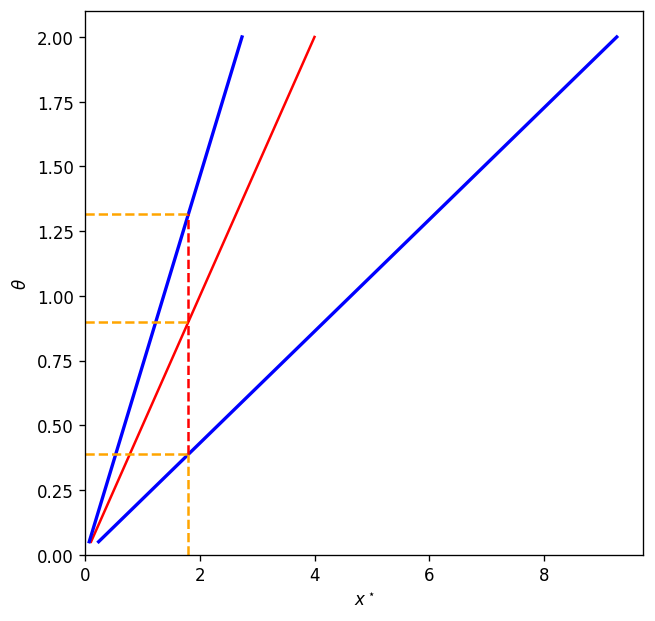

In [10]:
plt.figure(figsize=(6,6), dpi=120)
plt.plot(x_hat, theta, linestyle='-', color='r')
plt.plot(x_lo, theta, color='b', linewidth=2)
plt.plot(x_hi, theta, color='b', linewidth=2)
plt.plot([x_obs, x_obs], [0, theta_lo], color='orange', linestyle='--')
plt.plot([x_obs, x_obs], [theta_lo, theta_hi], color='red', linestyle='--')
plt.plot([0, x_obs], [theta_hat, theta_hat], color='orange', linestyle='--')
plt.plot([0, x_obs], [theta_lo, theta_lo], color='orange', linestyle='--')
plt.plot([0, x_obs], [theta_hi, theta_hi], color='orange', linestyle='--')
plt.xlabel(r'$x^\star$')
plt.ylabel(r'$\theta$')
plt.ylim(0)
plt.xlim(0)
plt.show()

## *Coverage*

Per costruzione la probabilità che l'intervallo *copra* il valore vero è il 68%, per costruzione della cintura di confidenza. Questa proprietà prende il nome, in inglese, di **coverage**.

# Spunti per esercizi

* Ripetere il calcolo dell'intervallo di confidenza per una PDF che segua la distribuzione *beta* data da:

$\displaystyle f(x; \alpha, \beta) = \frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha,\beta)}$

Il parametro $\beta$ è vincolato ad essere pari a $\theta-\alpha$, con $\theta$ fissato (es.: $\theta=10$) in modo che ci sia un solo parametro da determinare ($\alpha$).

$\displaystyle f(x; \alpha) = \frac{x^{\alpha-1}(1-x)^{\theta-\alpha-1}}{B(\alpha,\theta-\alpha)}$


Si può usare l'impementazione [```beta```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html) di ```scipy```.

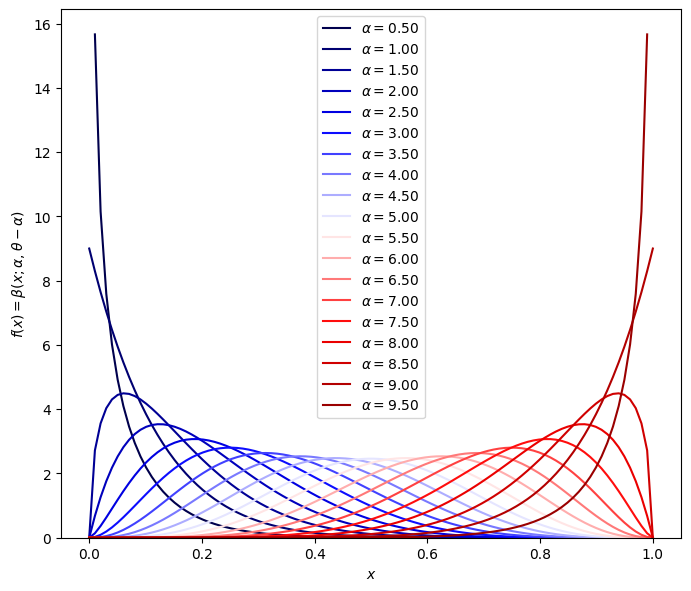

In [11]:
from scipy.stats import beta
x = np.linspace(0, 1, 100)
theta = 10
plt.figure(figsize=(8,7), dpi=100)
colormap =plt.get_cmap('seismic')
a_range = np.arange(0.5, 10, 0.5)
colors = np.linspace(0, 1, len(a_range)+1)
for a, c in zip(a_range, colors):
    b = theta - a
    model = beta(a, b)
    y = model.pdf(x)
    plt.plot(x,y,label=r"$\alpha={:.2f}$".format(a), color=colormap(c))
plt.ylim(bottom=0)
plt.xlabel('$x$')
plt.ylabel(r'$f(x)=\beta(x;\alpha, \theta-\alpha)$')
plt.legend()
plt.show()

In [12]:
def interval(alpha):
    model = beta(alpha, 10-alpha)
    x_hat = fmin(lambda x: -model.pdf(x), 0.5, disp=0)[0]
    x_lo = fsolve(lambda x: model.cdf(x)-p_lo, 0.1)[0]
    x_hi = fsolve(lambda x: model.cdf(x)-p_hi, 0.9)[0]
    return alpha, x_hat, x_lo, x_hi

In [13]:
band = [interval(alpha) for alpha in np.linspace(1, 9, 50)]

In [14]:
alpha = [i[0] for i in band]
x_hat = [i[1] for i in band]
x_lo = [i[2] for i in band]
x_hi = [i[3] for i in band]

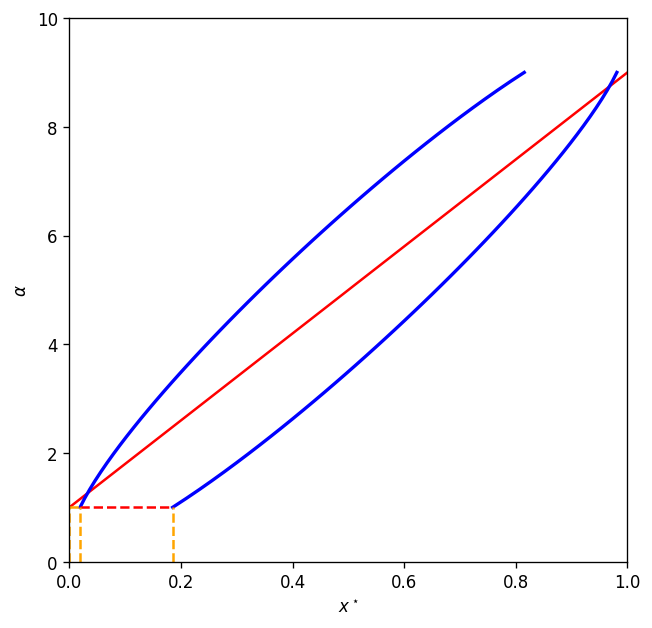

In [15]:
plt.figure(figsize=(6,6), dpi=120)
plt.plot(x_hat, alpha, linestyle='-', color='r')
plt.plot(x_lo, alpha, color='b', linewidth=2)
plt.plot(x_hi, alpha, color='b', linewidth=2)
pos=0
alpha_0 = alpha[pos]
plt.plot([0, x_lo[pos]], [alpha_0, alpha_0], color='orange', linestyle='--')
plt.plot([x_lo[pos], x_hi[pos]], [alpha_0, alpha_0], color='red', linestyle='--')
plt.plot([x_hi[pos], x_hi[pos]], [0, alpha_0], color='orange', linestyle='--')
plt.plot([x_lo[pos], x_lo[pos]], [0, alpha_0], color='orange', linestyle='--')
plt.plot([x_hat[pos], x_hat[pos]], [0, alpha_0], color='orange', linestyle='--')
plt.xlabel(r'$x^\star$')
plt.ylabel(r'$\alpha$')
plt.ylim(0,10)
plt.xlim(0,1)
plt.show()

<span style="color: red">Da notare che, per alcuni valori, il valore più probabile è *fuori* dall'intervallo al 68%!</span>

Un trattamento completo richiederebbe il trattamento particolare dei casi "patologici".

In particolare, la definizione di intervallo con code di area simmetrica non si adatta a questo modello di PDF.

Proviamo ad implementare un il metodo con un intervallo di minima larghezza, ossia quello per il quale la PDF ha lo stesso valore per entrambi gli estremi, come abbiamo dimostrato a suo tempo.

Questa implementazione risulterà numericamente abbastanza più lenta.

In [65]:
def interval_shortest(alpha):
    model = beta(alpha, 10-alpha)
    if alpha<=1: x_hat = 0
    elif alpha>=9: x_hat = 1
    else: x_hat = fmin(lambda x: -model.pdf(x), 0.5, disp=0)[0]
    def int_area(h):
        if alpha<=1: x_lo = 0
        else: x_lo = bisect(lambda x: model.pdf(x)-h, 0, x_hat)
        if alpha>=9: x_hi = 1
        else: x_hi = bisect(lambda x: model.pdf(x)-h, x_hat, 1)
        return x_lo, x_hi, model.cdf(x_hi)-model.cdf(x_lo)
    if alpha<1 or alpha>9: mm = 10
    else: mm = model.pdf(x_hat)
    h = bisect(lambda h: int_area(h)[2]-0.6827, 0, mm)
    x_lo, x_hi, a = int_area(h)
    print("α = {:.2f} : {:.3f}, [{:.3f}, {:.3f}]".format(alpha, x_hat, x_lo, x_hi))
    return alpha, x_hat, x_lo, x_hi

In [66]:
band = [interval_shortest(alpha) for alpha in np.linspace(0.5, 9.5, 46)]

α = 0.50 : 0.000, [0.000, 0.053]
α = 0.70 : 0.000, [0.000, 0.080]
α = 0.90 : 0.000, [0.000, 0.107]
α = 1.10 : 0.012, [0.000, 0.133]
α = 1.30 : 0.037, [0.002, 0.159]
α = 1.50 : 0.062, [0.009, 0.189]
α = 1.70 : 0.087, [0.021, 0.219]
α = 1.90 : 0.112, [0.034, 0.250]
α = 2.10 : 0.137, [0.049, 0.279]
α = 2.30 : 0.162, [0.065, 0.309]
α = 2.50 : 0.187, [0.082, 0.337]
α = 2.70 : 0.212, [0.100, 0.365]
α = 2.90 : 0.237, [0.119, 0.393]
α = 3.10 : 0.262, [0.138, 0.420]
α = 3.30 : 0.287, [0.158, 0.447]
α = 3.50 : 0.312, [0.178, 0.473]
α = 3.70 : 0.337, [0.198, 0.499]
α = 3.90 : 0.362, [0.219, 0.524]
α = 4.10 : 0.387, [0.241, 0.549]
α = 4.30 : 0.412, [0.263, 0.574]
α = 4.50 : 0.437, [0.285, 0.599]
α = 4.70 : 0.462, [0.308, 0.623]
α = 4.90 : 0.487, [0.330, 0.646]
α = 5.10 : 0.512, [0.354, 0.670]
α = 5.30 : 0.538, [0.377, 0.692]
α = 5.50 : 0.562, [0.401, 0.715]
α = 5.70 : 0.588, [0.426, 0.737]
α = 5.90 : 0.613, [0.451, 0.759]
α = 6.10 : 0.638, [0.476, 0.781]
α = 6.30 : 0.663, [0.501, 0.802]
α = 6.50 :

In [61]:
alpha = [i[0] for i in band]
x_hat = [i[1] for i in band]
x_lo = [i[2] for i in band]
x_hi = [i[3] for i in band]

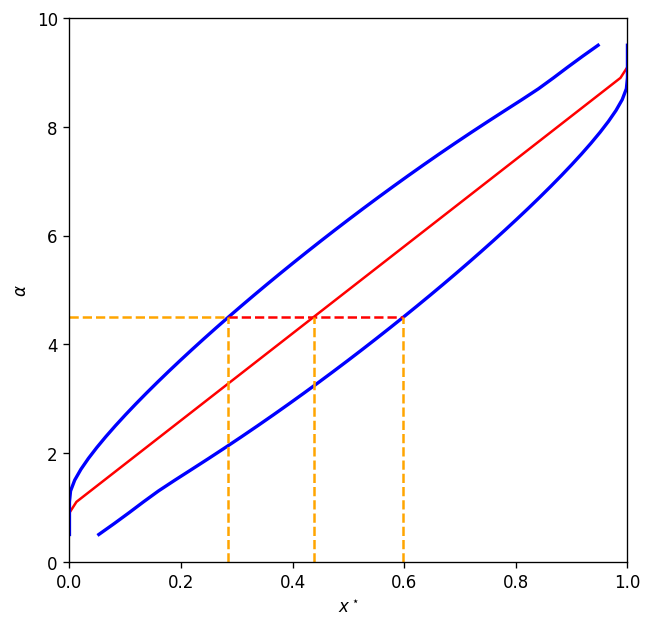

In [62]:
plt.figure(figsize=(6,6), dpi=120)
plt.plot(x_hat, alpha, linestyle='-', color='r')
plt.plot(x_lo, alpha, color='b', linewidth=2)
plt.plot(x_hi, alpha, color='b', linewidth=2)
pos=20
alpha_0 = alpha[pos]
plt.plot([0, x_lo[pos]], [alpha_0, alpha_0], color='orange', linestyle='--')
plt.plot([x_lo[pos], x_hi[pos]], [alpha_0, alpha_0], color='red', linestyle='--')
plt.plot([x_hi[pos], x_hi[pos]], [0, alpha_0], color='orange', linestyle='--')
plt.plot([x_lo[pos], x_lo[pos]], [0, alpha_0], color='orange', linestyle='--')
plt.plot([x_hat[pos], x_hat[pos]], [0, alpha_0], color='orange', linestyle='--')
plt.xlabel(r'$x^\star$')
plt.ylabel(r'$\alpha$')
plt.ylim(0,10)
plt.xlim(0,1)
plt.show()

In questo caso, il valore più probabile, $\hat{x}$, sarà sempre contenuto all'interno dell'intervallo al 68% di probabilità. Quindi il valore centrale $\hat{\alpha}$ sarà anch'esso contenuto nell'intervallo di confidenza che si ottiene "invertendo" la bannda di confidenza costruita col metodo descritto sopra.

Va notato che, per $\alpha<1$ e per $\alpha>9$, l'intervallo è completamente asimmetrico, ossia parte dall'estremo sinistro $x=0$ per $\alpha<1$ e arriva a quello destro $x=1$ per $\alpha>9$.